In [1]:
from sunpycube.cube.datacube import Cube
from sunpycube.wcs_util import WCS
import matplotlib.pyplot as plt
from irispy.spectrograph import IRISRaster
raster_file = "/home/ankit/Desktop/DATA/STEVE/iris_l2_20141211_191222_3803105278_raster_t000_r00000.fits"
raster = IRISRaster(raster_file)

In [2]:
raster.meta

{'AEC exposures in OBS': 0,
 'BSCALE': 0.25,
 'BZERO': 7992,
 'DATA_SRC': 1.51,
 'FOV X axis': <Quantity 7.044008255 arcsec>,
 'FOV Y axis': <Quantity 182.32 arcsec>,
 'FOV center X axis': <Quantity 12.298 arcsec>,
 'FOV center Y axis': <Quantity -260.882 arcsec>,
 'IAECEVFL': False,
 'IAECFLAG': True,
 'IAECFLFL': True,
 'SAA': True,
 'build version': 'V8R6X',
 'camera': 'spectra',
 'data level': 2.0,
 'data quantity': 'Intensity',
 'data unit': 'Corrected DN',
 'date data created': datetime.datetime(2016, 5, 11, 0, 0),
 'detector gain': {'FUV': 6.0, 'NUV': 18.0, 'SJI': 18.0},
 'detector yield': {'FUV': 1.5, 'NUV': 1.0, 'SJI': 1.0},
 'dsun': <Quantity 147297000000.0 m>,
 'exposure time max': 1.9996,
 'exposure time mean': 1.99954,
 'exposure time min': 1.99944,
 'high latitude flag': 0,
 'instrument': 'SPEC',
 'level 2 reformatting date': datetime.datetime(2016, 5, 11, 2, 12, 26, 902000),
 'level 2 reformatting version': 'L12-2015-11-03',
 'look-up table ID': 4.0,
 'number unique rast

In [3]:
raster.spectral_windows

name,detector type,brightest wavelength,min wavelength,max wavelength
,,Angstrom,Angstrom,Angstrom
str12,str4,float64,float64,float64
C II 1336,FUV1,1335.71,1331.9,1340.52
O I 1356,FUV1,1355.6,1346.85,1357.52
Si IV 1394,FUV2,1393.78,1391.3042,1396.1842
Si IV 1403,FUV2,1402.77,1398.2242,1406.7442
2832,NUV,2832.77,2831.29,2834.24
2814,NUV,2814.49,2812.6,2816.37
Mg II k 2796,NUV,2796.2,2790.55,2809.9


In [4]:
windows = raster.spectral_windows['name']

In [5]:
windows

C II 1336
O I 1356
Si IV 1394
Si IV 1403
2832
2814
Mg II k 2796


In [6]:
raster.data[windows[-1]].animate()

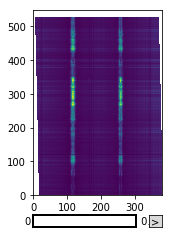

In [7]:
plt.show()

In [8]:
raster.data

{'2814': Cube([[[    nan,     nan,     nan, ...,  258.  ,  182.5 ,  209.5 ],
        [    nan,     nan,     nan, ...,  246.75,  176.75,  204.5 ],
        [    nan,     nan,     nan, ...,  229.5 ,  158.25,  196.  ],
        ..., 
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],
 
       [[    nan,     nan,     nan, ...,  270.5 ,  174.  ,  208.25],
        [    nan,     nan,     nan, ...,  268.  ,  165.25,  211.75],
        [    nan,     nan,     nan, ...,  230.5 ,  146.25,  179.25],
        ..., 
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],
 
       [[    nan,     nan,     nan, ...,  211.5 ,  157.  ,  165.  ],
        [    nan,     nan,     nan, ...,  214.5 ,  161.25,  1

In [9]:
raster.wcs

{'celestial': {'scan0': WCS Keywords
  
  Number of WCS axes: 2
  CTYPE : 'HPLT-TAN'  'HPLN-TAN'  
  CRVAL : -0.072467222222222225  0.0034161111111111111  
  CRPIX : 274.5  4.0  
  PC1_1 PC1_2  : 0.99993818998299999  -0.033827780520499999  
  PC2_1 PC2_2  : 0.00376150493276  0.99993818998299999  
  CDELT : 9.2416666666666659e-05  0.00027714449261861111  
  NAXIS : 333  548  8}, 'spectral': {'2814': WCS Keywords
  
  Number of WCS axes: 3
  CTYPE : 'WAVE'  'HPLT-TAN'  'HPLN-TAN'  
  CRVAL : 2.8126000000000002e-07  -0.072467222222222225  0.0034161111111111111  
  CRPIX : 1.0  274.5  4.0  
  PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
  PC2_1 PC2_2 PC2_3  : 0.0  0.99993818998299999  -0.033827780520499999  
  PC3_1 PC3_2 PC3_3  : 0.0  0.00376150493276  0.99993818998299999  
  CDELT : 5.0920000000000005e-12  9.2416666666666659e-05  0.00027714449261861111  
  NAXIS : 75  548  8, '2832': WCS Keywords
  
  Number of WCS axes: 3
  CTYPE : 'WAVE'  'HPLT-TAN'  'HPLN-TAN'  
  CRVAL : 2.8312899999999999e-

Mg II k 2796


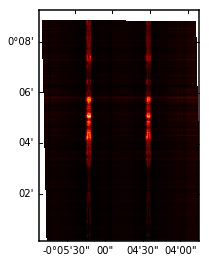

In [11]:
print(windows[-1])
data = raster.data[windows[-1]].data
wcs = raster.wcs['spectral'][windows[-1]]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs, slices=(5, 'x', 'y'))
ax.coords[2].set_ticks(exclude_overlapping=True)
ax.imshow(data[5, :, :], cmap=plt.cm.gist_heat, origin='lower')
plt.show()

In [12]:
raster.wcs['spectral'][windows[-1]].wcs

       flag: 137
      naxis: 3
      crpix: 0x5971cf0
               1.0000       274.50       4.0000    
         pc: 0x5971c50
    pc[0][]:   1.0000       0.0000       0.0000    
    pc[1][]:   0.0000       0.99994     -0.033828  
    pc[2][]:   0.0000       0.0037615    0.99994   
      cdelt: 0x5971d10
               5.0920e-12   9.2417e-05   0.00027714
      crval: 0x40a1ca0
               2.7906e-07  -0.072467     0.0034161 
      cunit: 0x5a56b70
             "m"
             "deg"
             "deg"
      ctype: 0x5871210
             "WAVE"
             "HPLT-TAN"
             "HPLN-TAN"
    lonpole: 180.000000
    latpole: -0.072467
    restfrq: 0.000000
    restwav: 0.000000
        npv: 0
     npvmax: 0
         pv: 0x0
        nps: 0
     npsmax: 0
         ps: 0x0
         cd: 0x40a1cc0
    cd[0][]:   0.0000       0.0000       0.0000    
    cd[1][]:   0.0000       0.0000       0.0000    
    cd[2][]:   0.0000       0.0000       0.0000    
      crota: 0x596cc10
        